In [2]:
#imports 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#show all columns with scroll bar
pd.set_option('display.max_columns', 500)

#import machines learning modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder #did not use
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from numpy import loadtxt
from xgboost import plot_importance
import xgboost as xgboost

#mapping using geopandas, descartes & shapely
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline



In [3]:
#some weird data types in there or characters, importing with ICO-8859-1 fixed that

df = pd.read_csv("complete.csv",encoding='ISO-8859-1' )

C:\Users\jbike\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,6,8,10,11,13,14,15,16,17,18,22,23,41,42,43,44,56,181,182,184,185,186,187,188,189,190,191) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.describe()
#about 1 million sample ids

,sample_id,latitude,longitude,loc_prec,depth,density,quartz,feldspar,lithics,p_velocity,density_model,heat_production,heat_production_mass,ref_id,iso_id,comp_id,major_id,trace_id,rgroup_id,age_id,method_id,country_id,age_min,age,age_max,age_sd,mg_number,fe_number,mali,asi,maficity,cia,wip,spar,qtzindex,r1,r2,rb87_sr86,rb87_sr87,sr87_sr86,nd143_nd144,sm147_nd144,lu176_hf177,hf176_hf177,re187_os186,re187_os188,os187_os188,pb206_pb204,pb207_pb204,pb208_pb204,th232_pb204,th232_u238,u238_pb204,epsilon_hf,epsilon_nd,epsilon_sr,sio2,tio2,al2o3,cr2o3,fe2o3,fe2o3_tot,feo,feo_tot,mgo,cao,mno,nio,k2o,na2o,sro,p2o5,h2o_plus,h2o_minus,h2o_tot,co2,so3,bao,caco3,mgco3,loi,f_ppm,cl_ppm,br_ppm,i_ppm,h_ppm,c_ppm,n_ppm,p_ppm,s_ppm,al_ppm,as_ppm,ag_ppm,au_ppm,b_ppm,ba_ppm,be_ppm,bi_ppm,ca_ppm,cd_ppm,ce_ppm,co_ppm,cr_ppm,cs_ppm,cu_ppm,dy_ppm,er_ppm,eu_ppm,fe_ppm,ga_ppm,gd_ppm,ge_ppm,hf_ppm,hg_ppm,ho_ppm,in_ppm,ir_ppm,k_ppm,la_ppm,li_ppm,lu_ppm,mg_ppm,mn_ppm,mo_ppm,na_ppm,nd_ppm,ni_ppm,nb_ppm,os_ppm,pa_ppm,pb_ppm,pd_ppm,pm_ppm,pr_ppm,pt_ppm,rb_ppm,re_ppm,rh_ppm,ru_ppm,sb_ppm,sc_ppm,se_ppm,si_ppm,sm_ppm,sn_ppm,sr_ppm,ta_ppm,tb_ppm,te_ppm,th_ppm,ti_ppm,tl_ppm,tm_ppm,w_ppm,v_ppm,u_ppm,y_ppm,yb_ppm,zn_ppm,zr_ppm
count,1.022092e+06,1.006456e+06,1.006404e+06,460363.000000,8981.000000,21856.000000,48900.000000,48900.000000,48900.000000,649435.000000,607716.000000,233185.000000,2.571110e+05,1.022092e+06,1.022092e+06,1.022092e+06,1.022092e+06,1.022092e+06,1.022092e+06,1.022092e+06,1.022092e+06,1.022092e+06,343562.000000,386978.000000,358834.000000,313480.000000,756447.000000,756447.000000,633509.000000,632176.000000,756460.000000,632226.000000,630105.000000,633509.000000,629442.000000,605501.000000,690754.000000,23506.000000,11.000000,71674.000000,59239.000000,22897.000000,2317.000000,8080.000000,169.000000,3436.000000,4589.000000,34253.000000,34076.000000,34050.000000,1050.000000,503.000000,1591.000000,10.000000,372.000000,63.000000,665242.000000,653954.000000,658185.000000,25552.000000,298602.00000,178945.000000,308243.000000,88160.000000,656596.000000,657927.000000,618752.000000,7723.000000,668943.000000,642487.000000,1902.000000,618787.000000,84330.000000,72542.000000,9937.000000,128199.000000,6717.000000,2443.000000,31321.000000,611.000000,335561.000000,71212.000000,45888.000000,4379.000000,678.000000,25.000000,3199.000000,43.000000,7.377200e+04,78369.000000,9.123900e+04,142868.000000,9.689900e+04,4.509100e+04,102060.000000,639120.000000,184633.000000,77282.000000,1.779450e+05,55562.000000,446213.000000,418756.000000,565362.000000,194042.000000,4.907750e+05,216335.000000,204984.000000,298288.000000,2.260740e+05,302245.000000,229572.000000,38447.000000,255917.000000,41922.000000,192745.000000,8994.000000,12035.000000,116951.000000,469443.00000,147564.000000,267883.000000,1.871390e+05,1.985060e+05,173483.000000,1.131200e+04,372875.000000,5.766550e+05,468104.000000,9.315000e+03,1.750000e+02,4.521100e+05,2.930200e+04,0.0,207443.000000,2.274000e+04,503494.000000,8.720000e+03,4904.000000,5.615000e+03,94263.000000,426359.000000,4.312200e+04,317.000000,307340.000000,105793.00000,654293.000000,246620.000000,260130.000000,18079.000000,405230.000000,217183.000000,33465.000000,171990.000000,73726.000000,524629.000000,339520.000000,600275.000000,341810.000000,467275.000000,609590.000000
mean,5.110465e+05,2.422386e+01,-2.498868e+01,55.980513,231.120673,2816.581065,67.286567,10.875425,21.838008,6.834352,2850.401025,3.143103,2.223239e-03,1.149262e+04,7.777116e+04,4.060493e+05,4.361907e+05,4.635589e+05,2.805553e+01,3.370044e+04,1.285277e+03,1.317406e+02,478.827794,587.116688,649.846065,105.835385,0.508914,0.643207,-2.004196,1.118213,0.245489,44.760905,78.810509,-0.174878,0.134358,1.998317,1.359269,9.484278,1.628545,0.709658,0.512627,0.139872,0.019918,0.282963,1013.330935,197.356759,0.623223,19.226658,15.853716,39.350820,97.837583,3.886007,23.495667,11.525000,2.303678,18.331746,55.849015,1.099505,14.077257,0.224399,4.70275,8.105529,5.518889,8.277706,5.699348,7.041759,0.

In [5]:
df.head(3)

,sample_id,sample_name,latitude,longitude,loc_prec,qgis_geom,datum,depth,material,rock_name,protolith,sample_description,density,comments,qap_name,sia_scheme,frost_class1,frost_class2,frost_class3,quartz,feldspar,lithics,facies,texture,p_velocity,density_model,heat_production,heat_production_mass,ref_id,iso_id,comp_id,major_id,trace_id,rgroup_id,age_id,method_id,country_id,age_min,age,age_max,age_sd,time_period_min,time_period,time_period_max,age_method,mg_number,fe_number,mali,asi,maficity,cia,wip,spar,qtzindex,r1,r2,rock_type,rb87_sr86,rb87_sr87,sr87_sr86,nd143_nd144,sm147_nd144,lu176_hf177,hf176_hf177,re187_os186,re187_os188,os187_os188,pb206_pb204,pb207_pb204,pb208_pb204,th232_pb204,th232_u238,u238_pb204,epsilon_hf,epsilon_nd,epsilon_sr,sio2,tio2,al2o3,cr2o3,fe2o3,fe2o3_tot,feo,feo_tot,mgo,cao,mno,nio,k2o,na2o,sro,p2o5,h2o_plus,h2o_minus,h2o_tot,co2,so3,bao,caco3,mgco3,loi,f_ppm,cl_ppm,br_ppm,i_ppm,h_ppm,c_ppm,n_ppm,p_ppm,s_ppm,al_ppm,as_ppm,ag_ppm,au_ppm,b_ppm,ba_ppm,be_ppm,bi_ppm,ca_ppm,cd_ppm,ce_ppm,co_ppm,cr_ppm,cs_ppm,cu_ppm,dy_ppm,er_ppm,eu_ppm,fe_ppm,ga_ppm,gd_ppm,ge_ppm,hf_ppm,hg_ppm,ho_ppm,in_ppm,ir_ppm,k_ppm,la_ppm,li_ppm,lu_ppm,mg_ppm,mn_ppm,mo_ppm,na_ppm,nd_ppm,ni_ppm,nb_ppm,os_ppm,pa_ppm,pb_ppm,pd_ppm,pm_ppm,pr_ppm,pt_ppm,rb_ppm,re_ppm,rh_ppm,ru_ppm,sb_ppm,sc_ppm,se_ppm,si_ppm,sm_ppm,sn_ppm,sr_ppm,ta_ppm,tb_ppm,te_ppm,th_ppm,ti_ppm,tl_ppm,tm_ppm,w_ppm,v_ppm,u_ppm,y_ppm,yb_ppm,zn_ppm,zr_ppm,rock_group,rock_origin,rock_facies,country,method,author,title,journal,year,doi,bibtex,data_source
0,1,93286771,-53.10,73.80,1000.0,0101000020e61000003333333333735240cdcccccccc8c...,unknown,NaN,NaN,dacite,NaN,dacite pumice,NaN,NaN,dacite,i,magnesian,calcic,metaluminous,NaN,NaN,NaN,NaN,NaN,6.378562,2719.911899,NaN,NaN,14951,81475,176362,492522,175411,17,43320,1,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.417896,0.744972,1.896718,0.815649,0.088107,44.923288,72.011852,-0.246057,0.162710,2.336156,0.813320,granodiorite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.72,0.41,13.90,NaN,1.06,3.96,2.61,NaN,1.22,4.22,0.07,NaN,0.57,5.48,NaN,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1050.0,NaN,NaN,1.0,NaN,NaN,87.0,NaN,0.0,NaN,NaN,11.0,NaN,5.0,0.0,26.0,NaN,NaN,NaN,NaN,13.0,NaN,2.5,5.0,NaN,NaN,NaN,NaN,NaN,0.0,12.0,NaN,NaN,495.0,NaN,NaN,7.0,5.0,3.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,2.0,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,3.0,121.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,21.0,0.0,34.0,NaN,45.0,97.0,igneous,volcanic,NaN,tf,NaN,"champion, d. c., budd, a. r., hazell, m. s., a...",NaN,NaN,NaN,NaN,NaN,ozchem
1,2,93286774,-53.15,73.67,1000.0,0101000020e61000007b14ae47e16a5240333333333393...,unknown,NaN,NaN,phonolite,NaN,phonolite pumice,NaN,NaN,tephritic phonolite,a,ferroan,alkalic,peralkaline,NaN,NaN,NaN,NaN,NaN,6.373094,2674.271335,9.206429,0.003443,14951,81475,64913,335032,178369,17,43320,1,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.246303,0.865179,15.504072,0.734193,0.077796,42.336299,157.635489,-0.273860,-0.188980,-1.812082,0.576904,foid syenite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.36,0.50,19.75,NaN,1.61,4.42,2.53,NaN,0.62,1.43,0.12,NaN,5.49,11.29,NaN,0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2110.0,NaN,NaN,2.0,NaN,NaN,39.0,21.0,0.0,NaN,NaN,176.0,NaN,12.0,5.0,6.0,NaN,NaN,NaN,NaN,44.0,NaN,3.0,56.0,NaN,NaN,NaN,NaN,NaN,112.0,42.0,NaN,NaN,1043.0,NaN,NaN,37.0,10.0,281.0,NaN,NaN,40.0,NaN,NaN,13.0,NaN,205.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,9.0,113.0,12.0,NaN,NaN,65.0,NaN,NaN,NaN,NaN,13.0,17.0,36.0,NaN,157.0,2236.0,igneous,volcanic,NaN,tf,NaN,"champion, d. c., budd, a. r., hazell, m. s., a...",NaN,NaN,NaN,NaN,NaN,ozchem
2,3,93286772,-53.08,73.67,1000.0,0101000020e61000007b14ae47e16a52400ad7a3703d8a...,unknown,NaN,NaN,phonolite,NaN,phonolite pumice,NaN,NaN,tephritic phonolite,a,ferroan,alkalic,peralkaline,NaN,NaN,NaN,NaN,NaN,6.369678,2681.068501,10.989396,0.004099,14951,81475,59271,339892,165226,17,43320,1,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.

C:\Users\jbike\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\jbike\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


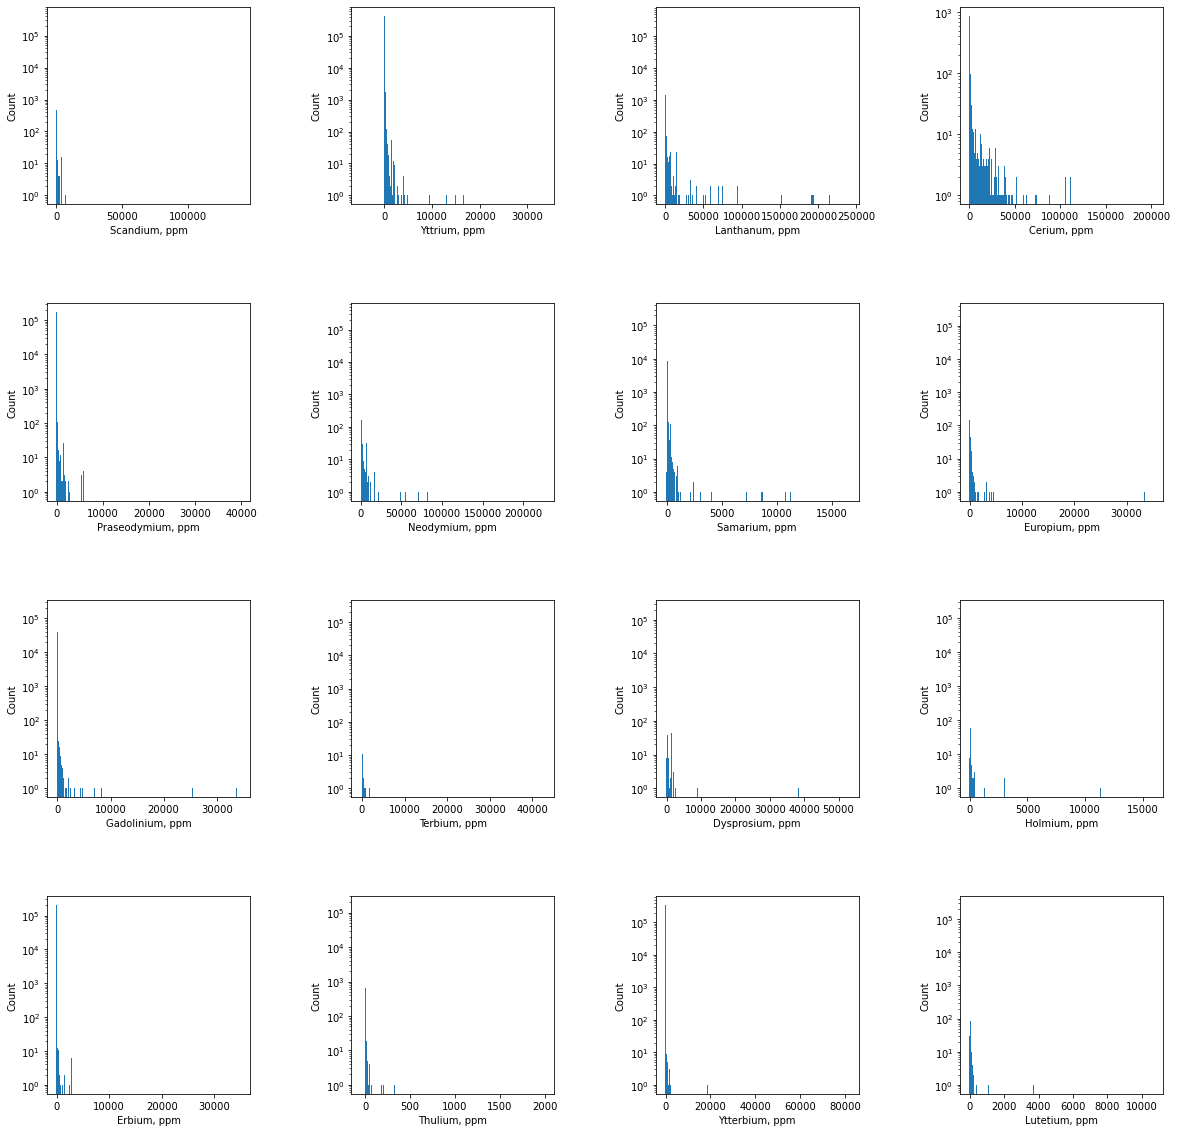

In [6]:
#histogram of rare earth metals

plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.subplot(4, 4, 1)  
plt.hist(x=df['sc_ppm'], log=True, bins = 1000)
plt.xlabel("Scandium, ppm")
plt.ylabel("Count")

plt.subplot(4, 4, 2)  
plt.hist(x=df['y_ppm'], log=True, bins = 1000)
plt.xlabel("Yttrium, ppm")
plt.ylabel("Count")

plt.subplot(4, 4, 3)  
plt.hist(x=df['la_ppm'], log=True, bins = 1000)
plt.xlabel("Lanthanum, ppm")
plt.ylabel("Count")

plt.subplot(4, 4, 4)  
plt.hist(x=df['c_ppm'], log=True, bins = 1000)
plt.xlabel("Cerium, ppm")
plt.ylabel("Count")

plt.subplot(4, 4, 5)  
plt.hist(x=df['pr_ppm'], log=True, bins = 1000)
plt.xlabel("Praseodymium, ppm")
plt.ylabel("Count")

plt.subplot(4, 4, 6)  
plt.hist(x=df['nd_ppm'], log=True, bins = 1000)
plt.xlabel("Neodymium, ppm")
plt.ylabel("Count")

plt.subplot(4, 4, 7)  
plt.hist(x=df['sm_ppm'], log=True, bins = 1000)
plt.xlabel("Samarium, ppm")
plt.ylabel("Count")

plt.subplot(4, 4, 8)  
plt.hist(x=df['eu_ppm'], log=True, bins = 1000)
plt.xlabel("Europium, ppm")
plt.ylabel("Count")

plt.subplot(4, 4, 9) 
plt.hist(x=df['gd_ppm'], log=True, bins = 1000)
plt.xlabel("Gadolinium, ppm")
plt.ylabel("Count")

plt.subplot(4, 4, 10)  
plt.hist(x=df['tb_ppm'], log=True, bins = 1000)
plt.xlabel("Terbium, ppm")
plt.ylabel("Count")

plt.subplot(4, 4, 11)  
plt.hist(x=df['dy_ppm'], log=True, bins = 1000)
plt.xlabel("Dysprosium, ppm")
plt.ylabel("Count")

plt.subplot(4,4,12)  
plt.hist(x=df['ho_ppm'], log=True, bins = 1000)
plt.xlabel("Holmium, ppm")
plt.ylabel("Count")

plt.subplot(4, 4, 13)  
plt.hist(x=df['er_ppm'], log=True, bins = 1000)
plt.xlabel("Erbium, ppm")
plt.ylabel("Count")

plt.subplot(4, 4, 14)  
plt.hist(x=df['tm_ppm'], log=True, bins = 1000)
plt.xlabel("Thulium, ppm")
plt.ylabel("Count")

plt.subplot(4, 4, 15) 
plt.hist(x=df['yb_ppm'], log=True, bins = 1000)
plt.xlabel("Ytterbium, ppm")
plt.ylabel("Count")

plt.subplot(4, 4, 16)  
plt.hist(x=df['lu_ppm'], log=True, bins = 1000)
plt.xlabel("Lutetium, ppm")
plt.ylabel("Count")

plt.show()


In [7]:
#drop the features that are not going to use or that have no data in them
 
df2 = df.drop(['th232_pb204','th232_u238','u238_pb204','mgco3','epsilon_hf','epsilon_nd','epsilon_sr','rb87_sr87','re187_os186','density','protolith','rock_name','qap_name','sia_scheme','frost_class1','frost_class2','frost_class3', 'facies', 'texture', 'time_period', 'age_method', 'rock_type', 'rock_group', 'rock_origin', 'rock_facies','age_min','material','age_max', 'age_sd','latitude','longitude','comments','density_model','time_period_min','time_period_max','country','loc_prec', 'qgis_geom','sample_description','datum','depth','data_source', 'bibtex', 'doi', 'year', 'journal', 'title', 'author', 'method', 'sample_id', 'sample_name'], axis=1)

In [8]:
#Pm not included because no entries in there
df2['rare_earth'] = df['sc_ppm']+df['y_ppm']+df['la_ppm']+df['ce_ppm']+df['pr_ppm']+df['nd_ppm']+df['sm_ppm']+df['eu_ppm']+df['gd_ppm']+df['tb_ppm']+df['dy_ppm']+df['ho_ppm']+df['er_ppm']+ df['tm_ppm']+df['yb_ppm']+df['lu_ppm']


In [9]:
df2 = df2.drop(['sc_ppm', 'y_ppm', 'la_ppm', 'ce_ppm', 'pr_ppm', 'nd_ppm', 'pm_ppm', 'sm_ppm', 'eu_ppm', 'gd_ppm', 'tb_ppm', 'dy_ppm', 'ho_ppm', 'er_ppm', 'tm_ppm', 'yb_ppm', 'lu_ppm'], axis=1)

In [10]:
df2['rare_earth'].describe()

count    100321.000000
mean        240.500869
std        1996.387965
min         -10.020000
25%         102.523333
50%         148.360000
75%         232.190000
max      275338.900000
Name: rare_earth, dtype: float64

In [11]:
#create a new dataframe and only keep the data that has values in it for rare earth
dfr = df2.dropna(subset = ['rare_earth'])
dfr.describe()

,quartz,feldspar,lithics,p_velocity,heat_production,heat_production_mass,ref_id,iso_id,comp_id,major_id,trace_id,rgroup_id,age_id,method_id,country_id,age,mg_number,fe_number,mali,asi,maficity,cia,wip,spar,qtzindex,r1,r2,rb87_sr86,sr87_sr86,nd143_nd144,sm147_nd144,lu176_hf177,hf176_hf177,re187_os188,os187_os188,pb206_pb204,pb207_pb204,pb208_pb204,sio2,tio2,al2o3,cr2o3,fe2o3,fe2o3_tot,feo,feo_tot,mgo,cao,mno,nio,k2o,na2o,sro,p2o5,h2o_plus,h2o_minus,h2o_tot,co2,so3,bao,caco3,loi,f_ppm,cl_ppm,br_ppm,i_ppm,h_ppm,c_ppm,n_ppm,p_ppm,s_ppm,al_ppm,as_ppm,ag_ppm,au_ppm,b_ppm,ba_ppm,be_ppm,bi_ppm,ca_ppm,cd_ppm,co_ppm,cr_ppm,cs_ppm,cu_ppm,fe_ppm,ga_ppm,ge_ppm,hf_ppm,hg_ppm,in_ppm,ir_ppm,k_ppm,li_ppm,mg_ppm,mn_ppm,mo_ppm,na_ppm,ni_ppm,nb_ppm,os_ppm,pa_ppm,pb_ppm,pd_ppm,pt_ppm,rb_ppm,re_ppm,rh_ppm,ru_ppm,sb_ppm,se_ppm,si_ppm,sn_ppm,sr_ppm,ta_ppm,te_ppm,th_ppm,ti_ppm,tl_ppm,w_ppm,v_ppm,u_ppm,zn_ppm,zr_ppm,rare_earth
count,3213.000000,3213.000000,3213.000000,93973.000000,83971.000000,8.650900e+04,100321.000000,100321.000000,100321.000000,100321.000000,100321.000000,100321.000000,100321.000000,100321.000000,100321.000000,38435.000000,93905.000000,93905.000000,93783.000000,93747.000000,93906.000000,93757.000000,93726.000000,93783.000000,93412.000000,92382.000000,95072.000000,5077.000000,14416.000000,15487.000000,6718.000000,744.000000,2288.000000,488.000000,804.000000,8100.000000,8037.000000,8054.000000,94101.000000,94554.000000,94665.000000,6171.000000,33071.000000,38794.000000,21962.000000,19161.000000,94572.000000,94550.000000,94271.000000,1408.000000,94130.000000,94303.000000,345.000000,93608.000000,3203.000000,4476.000000,495.000000,8708.000000,1910.000000,488.000000,42.000000,66583.000000,9697.000000,9974.000000,349.000000,27.000000,0.0,1243.000000,4.000000,9.712000e+03,13812.000000,7769.000000,15274.000000,6.742000e+03,4.339000e+03,8452.000000,97726.000000,18862.000000,16117.000000,8122.000000,8920.000000,79052.000000,88028.000000,67534.000000,7.372300e+04,11640.000000,66111.000000,7362.000000,93240.000000,1883.000000,5299.000000,2057.000000,9464.000000,27665.000000,13702.000000,12483.000000,27286.000000,6686.000000,9.364100e+04,98770.000000,1715.000000,1.900000e+01,84475.000000,9.133000e+03,2.707000e+03,97459.000000,1676.000000,1399.000000,1631.000000,11926.000000,9.178000e+03,9.000000,16529.000000,98941.000000,89800.000000,8800.000000,97911.000000,17093.000000,14144.000000,15006.000000,92192.000000,93641.000000,73418.000000,98712.000000,100321.000000
mean,73.487796,12.546787,13.965418,6.860907,1.260228,4.556767e-04,6600.415536,73852.938856,353731.974073,317068.550652,394837.167951,20.018800,36488.267262,1646.829358,97.418846,1401.820875,0.527691,0.631896,-2.542194,1.032059,0.294187,44.230077,78.892047,-0.181321,0.134814,1.983984,1.390698,2.953033,0.709076,0.512611,0.135630,0.015568,0.282927,38.470402,0.425141,19.837688,16.511160,40.940165,54.979339,1.195925,14.111753,0.130123,6.183067,9.510092,6.521534,7.738179,6.348922,7.024298,0.184115,0.100588,1.857740,2.932699,0.079058,0.315731,1.881747,0.956017,1.317477,1.844275,5.474576,0.113547,45.033095,2.582700,324.228391,343.936243,3.229198,0.557405,NaN,8792.657537,0.542500,1.663315e+03,2021.211204,20117.961064,115.421960,1.239208e+04,4.475215e+04,13.045418,541.363817,3.444014,0.294086,20959.220711,0.473414,39.126408,302.646802,3.022751,1.039518e+03,59677.498772,19.588254,1.856680,4.453274,173.461289,0.043682,263.719134,9807.518097,20.671136,7804.933568,1693.708571,1.312224,1303.875747,7.223785e+02,21.673095,1156.742339,1.283332e-04,15.430935,4.597730e+02,2.421425e+03,59.258252,2675.069261,489.426401,844.623141,-0.174111,8.158225e+02,2.975556,3.126938,428.833302,1.607647,5.318623,10.036860,4561.623440,0.532221,16.766778,180.410689,2.256222,99.620978,173.591503,240.500869
std,21.844569,9.268780,22.270680,0.554018,3.353875,2.251267e-03,5826.267380,18925.186794,184932.666470,193946.023670,187792.498172,15.164559,10551.783948,1660.985215,66.945045,1140.593722,0.174825,0.165647,7.717868,8.955143,0

In [12]:
dfr.head()

,quartz,feldspar,lithics,p_velocity,heat_production,heat_production_mass,ref_id,iso_id,comp_id,major_id,trace_id,rgroup_id,age_id,method_id,country_id,age,mg_number,fe_number,mali,asi,maficity,cia,wip,spar,qtzindex,r1,r2,rb87_sr86,sr87_sr86,nd143_nd144,sm147_nd144,lu176_hf177,hf176_hf177,re187_os188,os187_os188,pb206_pb204,pb207_pb204,pb208_pb204,sio2,tio2,al2o3,cr2o3,fe2o3,fe2o3_tot,feo,feo_tot,mgo,cao,mno,nio,k2o,na2o,sro,p2o5,h2o_plus,h2o_minus,h2o_tot,co2,so3,bao,caco3,loi,f_ppm,cl_ppm,br_ppm,i_ppm,h_ppm,c_ppm,n_ppm,p_ppm,s_ppm,al_ppm,as_ppm,ag_ppm,au_ppm,b_ppm,ba_ppm,be_ppm,bi_ppm,ca_ppm,cd_ppm,co_ppm,cr_ppm,cs_ppm,cu_ppm,fe_ppm,ga_ppm,ge_ppm,hf_ppm,hg_ppm,in_ppm,ir_ppm,k_ppm,li_ppm,mg_ppm,mn_ppm,mo_ppm,na_ppm,ni_ppm,nb_ppm,os_ppm,pa_ppm,pb_ppm,pd_ppm,pt_ppm,rb_ppm,re_ppm,rh_ppm,ru_ppm,sb_ppm,se_ppm,si_ppm,sn_ppm,sr_ppm,ta_ppm,te_ppm,th_ppm,ti_ppm,tl_ppm,w_ppm,v_ppm,u_ppm,zn_ppm,zr_ppm,rare_earth
21,NaN,NaN,NaN,6.169384,NaN,0.002405,16084,81475,664046,504888,225599,11,43320,2242,102,NaN,NaN,NaN,9.852072,0.976730,NaN,49.411413,97.886821,-0.030771,0.094050,NaN,0.413833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.85,0.351,15.31,NaN,NaN,NaN,NaN,NaN,0.29,0.91,0.065,NaN,6.17,4.55,NaN,0.060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,393.0,3.0,NaN,NaN,NaN,5.0,NaN,6.0,NaN,NaN,22.0,2.2,13.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,118.0,NaN,NaN,9.0,NaN,NaN,214.00,NaN,NaN,NaN,NaN,NaN,NaN,5.0,49.0,7.85,NaN,56.20,NaN,NaN,19.0,10.0,8.27,55.0,606.00,448.474
27,NaN,NaN,NaN,6.063478,NaN,NaN,17720,81475,662441,605061,405236,11,43320,5388,102,NaN,NaN,NaN,8.070000,1.180259,NaN,54.133894,74.506399,0.035784,0.212961,NaN,0.291736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.93,0.080,12.74,NaN,NaN,NaN,NaN,NaN,0.11,0.34,0.030,NaN,5.78,2.63,NaN,0.170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN,5.1,21.0,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.9,NaN,NaN,27.0,NaN,NaN,187.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,9.50,NaN,NaN,NaN,4.2,NaN,32.0,72.00,92.710
39,NaN,NaN,NaN,6.048196,NaN,0.000161,16941,81475,645891,588401,262929,82,43320,2242,102,NaN,NaN,NaN,-2.343298,0.401789,NaN,28.662597,11.506325,-0.034261,0.423445,NaN,0.356907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.46,0.090,1.52,NaN,NaN,NaN,NaN,NaN,0.86,2.44,5.060,NaN,0.19,0.06,NaN,0.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,NaN,NaN,NaN,1785.0,1.0,0.8,NaN,NaN,23.0,NaN,1.2,190.0,NaN,9.0,3.0,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,2.0,NaN,NaN,32.0,NaN,NaN,7.00,NaN,NaN,NaN,3.5,NaN,NaN,NaN,95.0,NaN,NaN,1.60,NaN,0.2,3.0,112.0,1.20,100.0,39.00,298.560
53,NaN,NaN,NaN,6.251237,0.726557,0.000271,18044,81475,144276,546192,555011,11,39168,5379,102,122.0,0.384864,0.770213,4.353941,1.067769,0.041701,51.638706,71.488767,-0.120492,0.185781,2.556308,0.626894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.28,0.230,15.69,NaN,NaN,NaN,1.81,NaN,0.54,2.70,0.054,NaN,2.87,4.16,NaN,0.069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,622.6,NaN,NaN,NaN,NaN,NaN,4.0,1.7,NaN,NaN,NaN,NaN,2.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,17.9,NaN,NaN,70.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,644.0,0.50,NaN,4.63,NaN,NaN,NaN,NaN,0.73,NaN,93.25,78.280
405,NaN,NaN,NaN,7.130511,NaN,0.000432,16084,81475,639357,270264,232418,11,43320,2242,102,NaN,NaN,NaN,-7.474118,0.562559,NaN,36.002406,85.091979,-0.246073,0.108388,NaN,1.870809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.39,1.374,14.51,NaN,NaN,NaN,NaN,NaN,6.91,11.40,0.146,NaN,1.56,2.46,NaN,0.280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1189.0,1.0,NaN,NaN,NaN,39.9,32.3,0.9,116.0,NaN,15.0,1.8,3.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,38.3,NaN,NaN,NaN,NaN,NaN,48.00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,405.0,2.68,NaN,9.04,NaN,NaN,20.0,285.0,1.63,55.0,131.00,202.589


Text(0, 0.5, 'Count')

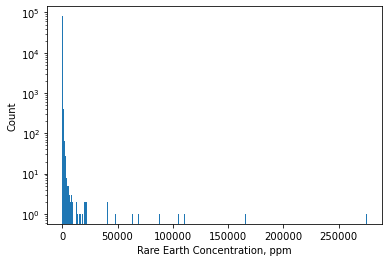

In [13]:
#histogram of rare earth metals
plt.hist(x=dfr['rare_earth'], log=True, bins = 1000)
plt.xlabel("Rare Earth Concentration, ppm")
plt.ylabel("Count")

#quite a few very low counts

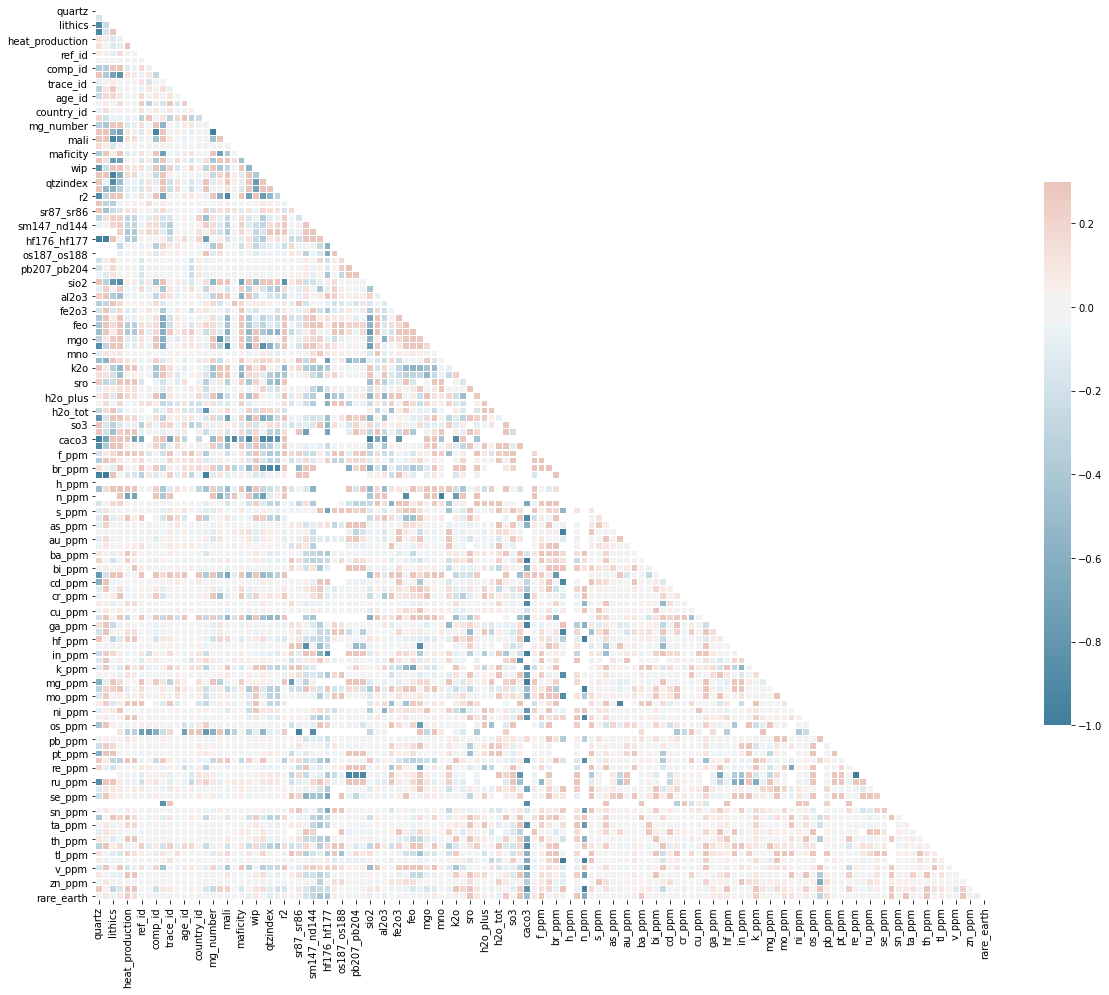

In [14]:
# Compute the correlation matrix
corr = dfr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [15]:
#regression model did not work that well - use classifier and determine a cut off for rare earths
#classifer - make 0 and 1 for rare earth column.  
#at about 200, more a balance between 0 and 1.  Relatively few over 500, accuracy goes up though
#when more selective and pick a higher value for ppm cut off

df_class=dfr
mask2 = df_class['rare_earth'] < 1000
df_class.loc[mask2, 'rare_earth'] = 0
mask = df_class['rare_earth'] >= 1000
df_class.loc[mask, 'rare_earth'] = 1


C:\Users\jbike\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [16]:
df_class['rare_earth'].value_counts()

0.0    99067
1.0     1254
Name: rare_earth, dtype: int64

In [17]:
# Split our preprocessed data into our features and target arrays for regression problems
y_class = df_class["rare_earth"]
X_class = df_class.drop(["rare_earth"], axis = 1)


# Split the preprocessed data into a training and testing dataset
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, random_state=78)

In [18]:
#use decision tree to see if that improves and look at shap plot to determine relative importance of parameters

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model_class = XGBClassifier()
model_class.fit(X_train_class, y_train_class)

y_pred_class = model_class.predict(X_test_class)

rmse = np.sqrt(mean_squared_error(y_test_class, y_pred_class))
print("RMSE: %f" % (rmse))

accuracy = accuracy_score(y_test_class, y_pred_class)
print("Accuracy score: %f" % (accuracy))

C:\Users\jbike\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:27:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
RMSE: 0.066825
Accuracy score: 0.995534


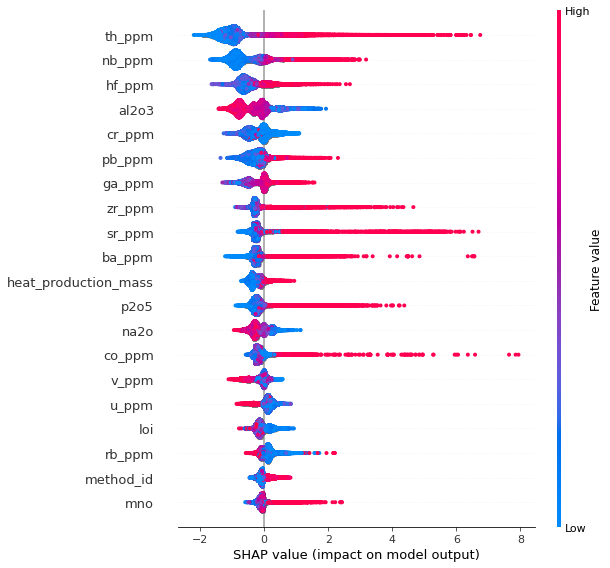

In [19]:
#look at feature importance
import shap
explainer = shap.TreeExplainer(model_class)
shap_values = explainer.shap_values(X_train_class)
shap.summary_plot(shap_values, X_train_class)

In [ ]:
# plot feature importance using built-in function and looks @ all features
# plot feature importance
ax = xgboost.plot_importance(model_class)
fig = ax.figure
fig.set_size_inches(10, 15)


In [20]:

#use model to predict if rare earths in full dataset (even the rows that did not have rare earth data)
features_full_dataset = df2.drop(['rare_earth'], axis=1)
y_pred_all = model_class.predict(features_full_dataset)
y_pred_all

array([0., 0., 0., ..., 0., 0., 0.])

In [21]:
#add the prediction array and latittude and longitude to a dataframe for plotting on a map
predict_full_dataset=features_full_dataset
predict_full_dataset['rare_earth_predict'] = y_pred_all.tolist()
predict_full_dataset['latitude']=df['latitude']
predict_full_dataset['longitude']=df['longitude']
predict_full_dataset['sample_id']=df['sample_id']
predict_full_dataset.head()

,quartz,feldspar,lithics,p_velocity,heat_production,heat_production_mass,ref_id,iso_id,comp_id,major_id,trace_id,rgroup_id,age_id,method_id,country_id,age,mg_number,fe_number,mali,asi,maficity,cia,wip,spar,qtzindex,r1,r2,rb87_sr86,sr87_sr86,nd143_nd144,sm147_nd144,lu176_hf177,hf176_hf177,re187_os188,os187_os188,pb206_pb204,pb207_pb204,pb208_pb204,sio2,tio2,al2o3,cr2o3,fe2o3,fe2o3_tot,feo,feo_tot,mgo,cao,mno,nio,k2o,na2o,sro,p2o5,h2o_plus,h2o_minus,h2o_tot,co2,so3,bao,caco3,loi,f_ppm,cl_ppm,br_ppm,i_ppm,h_ppm,c_ppm,n_ppm,p_ppm,s_ppm,al_ppm,as_ppm,ag_ppm,au_ppm,b_ppm,ba_ppm,be_ppm,bi_ppm,ca_ppm,cd_ppm,co_ppm,cr_ppm,cs_ppm,cu_ppm,fe_ppm,ga_ppm,ge_ppm,hf_ppm,hg_ppm,in_ppm,ir_ppm,k_ppm,li_ppm,mg_ppm,mn_ppm,mo_ppm,na_ppm,ni_ppm,nb_ppm,os_ppm,pa_ppm,pb_ppm,pd_ppm,pt_ppm,rb_ppm,re_ppm,rh_ppm,ru_ppm,sb_ppm,se_ppm,si_ppm,sn_ppm,sr_ppm,ta_ppm,te_ppm,th_ppm,ti_ppm,tl_ppm,w_ppm,v_ppm,u_ppm,zn_ppm,zr_ppm,rare_earth_predict,latitude,longitude,sample_id
0,NaN,NaN,NaN,6.378562,NaN,NaN,14951,81475,176362,492522,175411,17,43320,1,195,NaN,0.417896,0.744972,1.896718,0.815649,0.088107,44.923288,72.011852,-0.246057,0.162710,2.336156,0.813320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.72,0.41,13.90,NaN,1.06,3.96,2.61,NaN,1.22,4.22,0.07,NaN,0.57,5.48,NaN,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1050.0,NaN,NaN,1.0,NaN,NaN,87.0,NaN,0.0,NaN,NaN,NaN,5.0,0.0,26.0,NaN,13.0,2.5,5.0,NaN,NaN,NaN,NaN,12.0,NaN,495.0,NaN,NaN,5.0,3.0,NaN,NaN,0.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,121.0,0.0,NaN,0.0,NaN,NaN,NaN,21.0,0.0,45.0,97.0,0.0,-53.100000,73.800000,1
1,NaN,NaN,NaN,6.373094,9.206429,0.003443,14951,81475,64913,335032,178369,17,43320,1,195,NaN,0.246303,0.865179,15.504072,0.734193,0.077796,42.336299,157.635489,-0.273860,-0.188980,-1.812082,0.576904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.36,0.50,19.75,NaN,1.61,4.42,2.53,NaN,0.62,1.43,0.12,NaN,5.49,11.29,NaN,0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2110.0,NaN,NaN,2.0,NaN,NaN,39.0,21.0,0.0,NaN,NaN,NaN,12.0,5.0,6.0,NaN,44.0,3.0,56.0,NaN,NaN,NaN,NaN,42.0,NaN,1043.0,NaN,NaN,10.0,281.0,NaN,NaN,40.0,NaN,NaN,205.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,113.0,12.0,NaN,65.0,NaN,NaN,NaN,13.0,17.0,157.0,2236.0,0.0,-53.150000,73.670000,2
2,NaN,NaN,NaN,6.369678,10.989396,0.004099,14951,81475,59271,339892,165226,17,43320,1,195,NaN,0.229876,0.875400,15.193226,0.734329,0.081945,42.340806,154.976297,-0.281533,-0.181083,-1.733481,0.571353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.65,0.51,19.51,NaN,1.74,4.76,2.72,NaN,0.61,1.43,0.14,NaN,5.16,11.32,NaN,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,NaN,NaN,2.0,NaN,NaN,41.0,25.0,0.0,NaN,NaN,NaN,12.0,7.0,8.0,NaN,50.0,2.5,70.0,NaN,NaN,NaN,NaN,51.0,NaN,1269.0,NaN,NaN,8.0,332.0,NaN,NaN,52.0,NaN,NaN,235.0,NaN,NaN,NaN,NaN,NaN,NaN,12.0,111.0,14.0,NaN,78.0,NaN,NaN,NaN,13.0,20.5,189.0,2685.0,0.0,-53.080000,73.670000,3
3,NaN,NaN,NaN,6.390982,9.082251,0.003392,14951,81475,89754,339470,172696,17,43320,1,195,NaN,0.302746,0.828469,14.742958,0.746562,0.087149,42.744659,153.795171,-0.264472,-0.172715,-1.629382,0.609215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.61,0.59,19.72,NaN,1.66,4.62,2.66,NaN,0.86,1.64,0.12,NaN,5.40,10.88,NaN,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,610.0,NaN,NaN,2.0,NaN,NaN,54.0,22.0,0.0,NaN,NaN,NaN,17.0,4.0,8.0,NaN,48.0,2.5,58.0,NaN,NaN,NaN,NaN,42.0,NaN,1138.0,NaN,NaN,14.0,277.0,NaN,NaN,43.0,NaN,NaN,212.0,NaN,NaN,NaN,NaN,NaN,NaN,12.0,128.0,15.0,NaN,65.0,NaN,NaN,NaN,19.0,16.5,161.0,2210.0,0.0,-53.150000,73.670000,4
4,NaN,NaN,NaN,NaN,NaN,NaN,18429,81475,666061,661994,706560,23,43320,5254,102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [22]:
features_full_dataset['rare_earth_predict'].value_counts()

0.0    1016339
1.0       5753
Name: rare_earth_predict, dtype: int64

In [23]:
#plots on map
#https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

In [24]:
#read in shape files with world map
map = gpd.read_file('.\\maps\\World_Countries__Generalized_.shp')

In [25]:
#create geometry points with lat & long
geometry = [Point(xy) for xy in zip(features_full_dataset["longitude"], features_full_dataset["latitude"])]
geometry[:3]
#crs = coordinated reference system
crs = {'init': 'epsg:4326'}
geo_df=gpd.GeoDataFrame(features_full_dataset, crs=crs, geometry = geometry)            

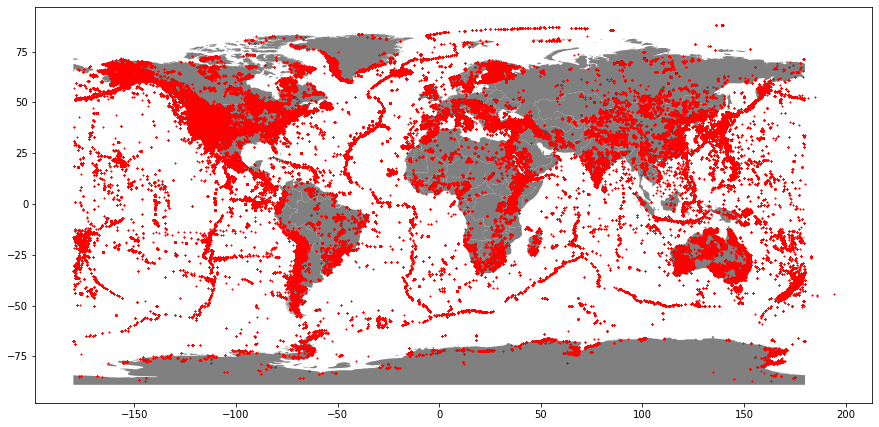

In [26]:
#create map with no rare earth points 
fig,ax=plt.subplots(figsize=(15,15))
map.plot(ax=ax, color="grey")
geo_df[geo_df['rare_earth_predict']==0].plot(ax=ax, markersize=1, color="red", marker='x')

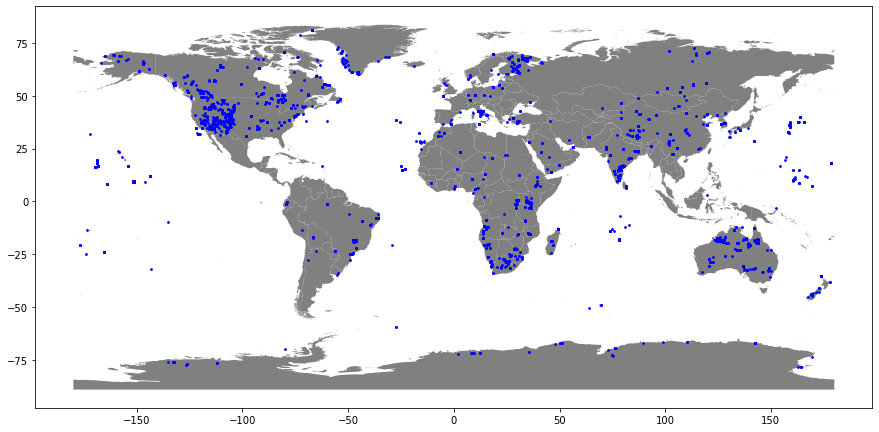

In [27]:
#create map with rare earth points @ cutoff >500 ppm value
fig,ax=plt.subplots(figsize=(15,15))
map.plot(ax=ax, color="grey")
geo_df[geo_df['rare_earth_predict']==1].plot(ax=ax, markersize=3, color="blue", marker ="o")

In [49]:
#add another dataset 
#https://mrdata.usgs.gov/ree/
#known rare earth mines or deposits with latititude & longitude in a csv file from usgs 
deposits = pd.read_csv('Deposits.csv' )

In [63]:
#create geometry points with lat & long
geometry2 = [Point(xy) for xy in zip(deposits["longitude"], deposits["latitude"])]
geometry2[:3]
#crs = coordinated reference system
crs = {'init': 'epsg:4326'}
geo_df2=gpd.GeoDataFrame(deposits, crs=crs, geometry = geometry2)   

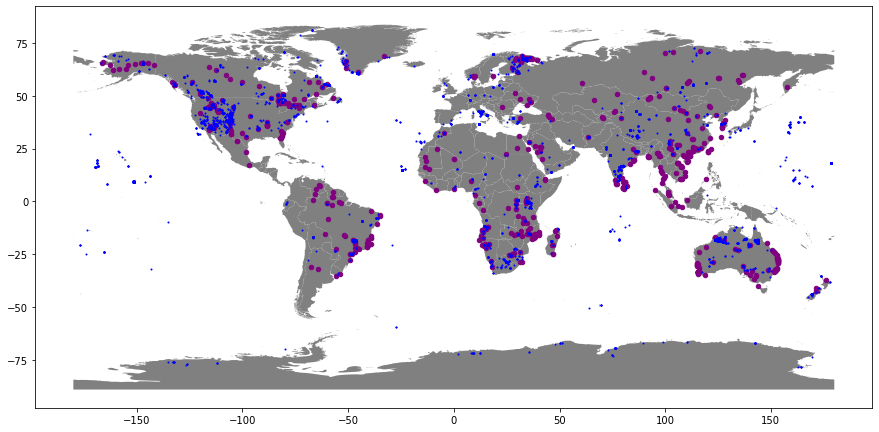

In [68]:
#df2 is known deposits  (purple)
#blue dots are additional potential deposits from this analysis
fig,ax=plt.subplots(figsize=(15,15))
map.plot(ax=ax, color="grey")
geo_df2[geo_df2['latitude']>-1000].plot(ax=ax, markersize=20, color="purple", marker='o')
geo_df[geo_df['rare_earth_predict']==1].plot(ax=ax, markersize=1, color="blue", marker ="o")